In [97]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


lets drop the loan id feature for further moves

In [98]:
df = df.drop("Loan_ID",axis=1)

In [99]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

as we can see the number of null values in each feature,we have to deal with them

in categorical feature we can fill them using mode

In [100]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [101]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace = True)
df["Married"].fillna(df["Married"].mode()[0],inplace = True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace =True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(),inplace = True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)


In [102]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

magic , we clear all the missing values

## Lets check on with the Exploratory Data Analysis

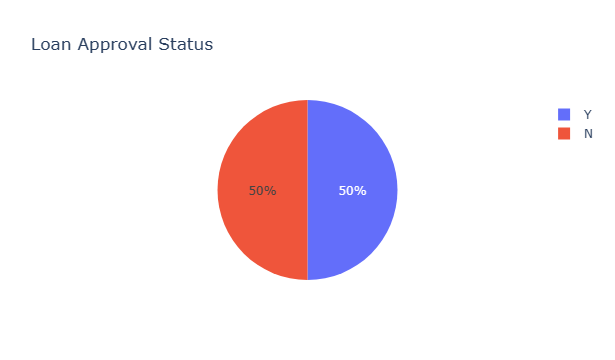

In [103]:
import plotly.express as px

loan_status_count = df["Loan_Status"].value_counts()
fig_loan_status = px.pie(loan_status_count,names = loan_status_count.index,title = "Loan Approval Status")

fig_loan_status.show()

now lets check out the distribution of the gender feature

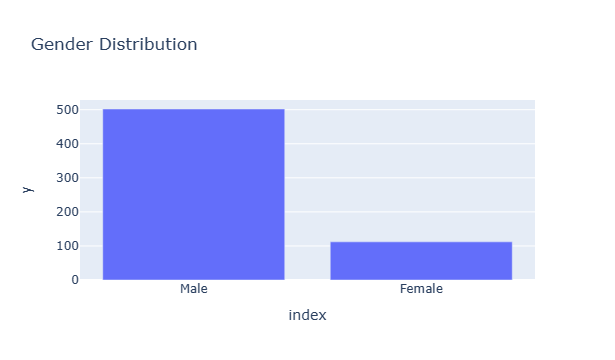

In [104]:
gender_count = df["Gender"].value_counts()
gender_fig = px.bar(gender_count,x=gender_count.index,y=gender_count.values,title = "Gender Distribution")
gender_fig.show()

lets look at the marital status feature 

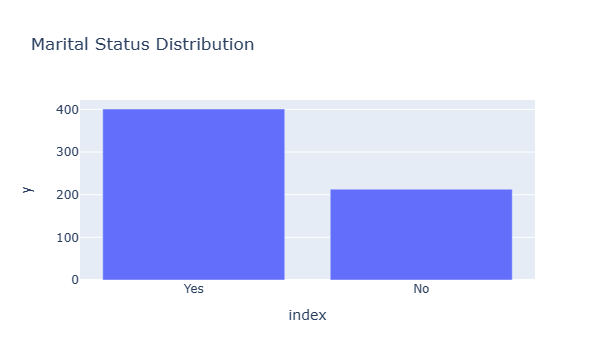

In [105]:
married_count = df['Married'].value_counts()
fig_married = px.bar(married_count,x=married_count.index,y=married_count.values,title = "Marital Status Distribution")
fig_married.show()

lets checkout the education feature

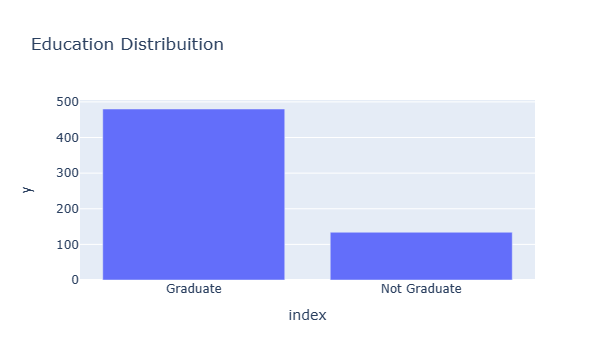

In [106]:
education_count = df["Education"].value_counts()
education_fig = px.bar(education_count,x=education_count.index,y=education_count.values,title="Education Distribuition")
education_fig.show()

lets check the self employed distribution

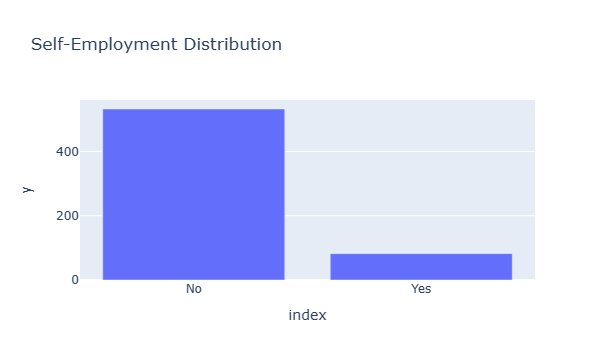

In [107]:
self_employed_count = df['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count, 
                           x=self_employed_count.index, 
                           y=self_employed_count.values, 
                           title='Self-Employment Distribution')
fig_self_employed.show()

now lets look at the applicant income feature

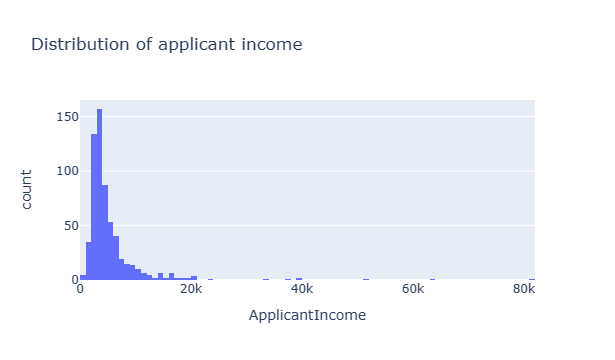

In [108]:
fig_applicant_income = px.histogram(df,x="ApplicantIncome",title="Distribution of applicant income")
fig_applicant_income.show()

lets check the relation ship between income and loan approval status

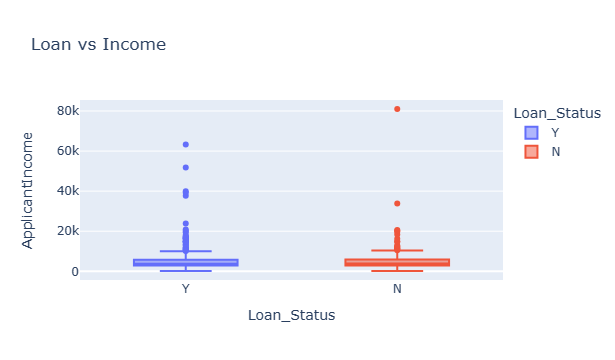

In [109]:
fig_income = px.box(df,x="Loan_Status",y="ApplicantIncome",color="Loan_Status",title="Loan vs Income")
fig_income.show()


applicant income feature contains as many outliers we want to remove outliers before moving further

In [110]:
#calculating the IQR
Q1 = df["ApplicantIncome"].quantile(0.25)
Q3 = df["ApplicantIncome"].quantile(0.75)
IQR = Q3 - Q1
#define Lower and upper bound

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

#Remove Outliers

df = df[(df["ApplicantIncome"] >= lower_bound) & (df["ApplicantIncome"] <= upper_bound)]

In [111]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

let check the co-applicant income with loan approval

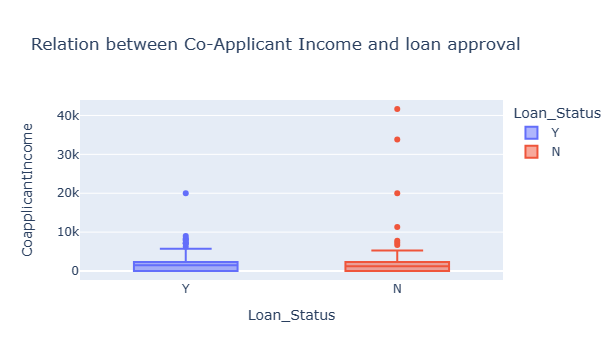

In [112]:
fig_coapplicant_income = px.box(df,x="Loan_Status",y="CoapplicantIncome",color = "Loan_Status",title = "Relation between Co-Applicant Income and loan approval")
fig_coapplicant_income.show()

lets remove the outliers in Co applicant Income as well

In [113]:
Q1 = df["CoapplicantIncome"].quantile(0.25)
Q3 = df["CoapplicantIncome"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

df = df[(df["CoapplicantIncome"] >= lower_bound) & (df["CoapplicantIncome"] <= upper_bound)] 

now lets look up with the loan amount and loan status

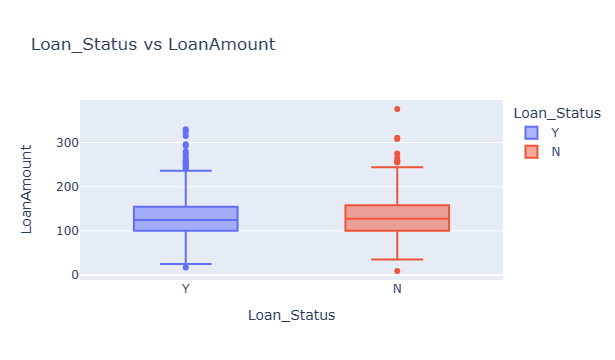

In [114]:
fig_loan_amount = px.box(df, x='Loan_Status', 
                         y='LoanAmount', 
                         color="Loan_Status",
                         title='Loan_Status vs LoanAmount')
fig_loan_amount.show()

lets look at the relation between credit history and loan status

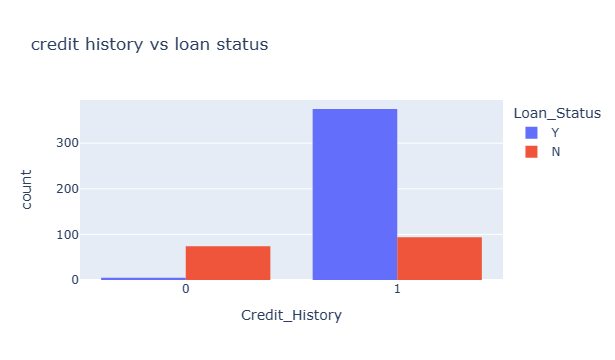

In [115]:
fig_credit_history = px.histogram(df,x = "Credit_History",color="Loan_Status",barmode="group",title="credit history vs loan status")
fig_credit_history.show()

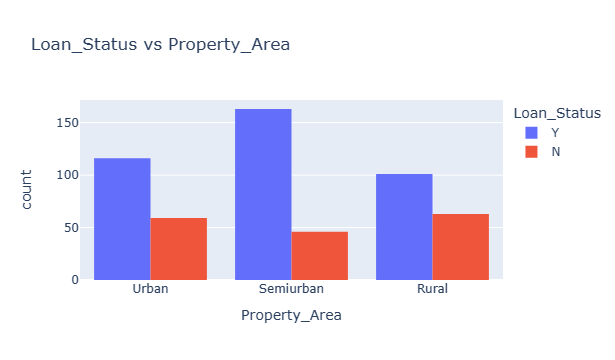

In [116]:
fig_property_area = px.histogram(df, x='Property_Area', color='Loan_Status', 
                                 barmode='group',
                                title='Loan_Status vs Property_Area')
fig_property_area.show()

## Data Preparation and Training Loan Approval Prediction Model

Converting categorical feature into numerical

In [117]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [118]:
# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=cat_cols)



In [119]:
# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [120]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [121]:
from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [122]:
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y']


In [123]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
277        -0.544528          -0.037922   -0.995242          0.312062   
84         -0.067325          -0.931554   -1.581818         -1.425804   
275        -0.734870           0.334654   -0.310903          0.312062   
392        -0.824919           0.522317   -0.213140          0.312062   
537        -0.267373          -0.931554   -0.467323          0.312062   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
277        0.402248              0            1           0            1   
84         0.402248              0            1           0            1   
275        0.402248              0            1           0            1   
392        0.402248              0            1           0            1   
537        0.402248              0            1           1            0   

     Dependents_0  ...  Dependents_2  Dependents_3+  Education_Graduate  \
277             1  ...       